### Poisson's Equation in 2D

In [1]:
# Import libraries
#
# numpy as usual, and then several libraries from matplotlib for 3D plotting/animation
#

import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import rc
import matplotlib
%matplotlib inline

#### Generic function for plotting a 3D surface (i.e. the value of a scalar field in 2D)

In [2]:
def plot2D(x, y, p, xrange, yrange):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis, 
                           linewidth=0, antialiased=False)
    ax.set_xlim(0, xrange)
    ax.set_ylim(0, yrange)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

### Navier-Stokes Equations for an Incompressible Fluid

\begin{equation}
\vec{\nabla} \cdot \vec{v} = 0
\end{equation}

\begin{equation}
\frac{\partial \vec{v}}{\partial t} + (\vec{v} \cdot \vec{\nabla}) \vec{v} = - \frac{1}{\rho} \nabla P +
\nu \nabla^2 \vec{v}
\end{equation}

The first of these is the continuity equation, which represents conservation of mass, and the second is the
momentum equation.  The problem here is that mathematically, there is no obvious
way to couple the velocity field and the pressure field.

However, for an incompressible flow, the first equation actually provides a 
$kinematic~constraint$.  Basically, what we have to do is to construct a pressure
field that guarantees that the continuity equation is satisfied.  We can
do this by taking the divergence of the momentum equation.

Momentum Equations in 2D:

\begin{equation}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x}  + v \frac{\partial u}{\partial y} = - \frac{1}{\rho} \frac{\partial P}{\partial x} + \nu \left ( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right )
\end{equation}

\begin{equation}
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x}  + v \frac{\partial v}{\partial y} = - \frac{1}{\rho} \frac{\partial P}{\partial y} + \nu \left ( \frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2} \right )
\end{equation}

To evaluate the divergence, we take the derivative of the first equation with respect to $x$, and the second
equation with respect to $y$, and then add them together:

\begin{equation}
\frac{\partial}{\partial t}(\frac{\partial u}{\partial x}) + (\frac{\partial u}{\partial x})^2  + u \frac{\partial^2 u}{\partial x^2} +  \frac{\partial v}{\partial x} \frac{\partial u}{\partial y} + v \frac{\partial^2 u}{\partial x \partial y} = - \frac{1}{\rho} \frac{\partial^2 P}{\partial x^2} + \nu \frac{\partial}{\partial x} \left ( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right )
\end{equation}

\begin{equation}
\frac{\partial}{\partial t}(\frac{\partial v}{\partial y}) + \frac{\partial v}{\partial x} \frac{\partial u}{\partial y} + u \frac{\partial^2 v}{\partial x \partial y}  + (\frac{\partial v}{\partial y})^2 +   v \frac{\partial^2 v}{\partial y^2}      = - \frac{1}{\rho} \frac{\partial^2 P}{\partial y^2} + \nu \frac{\partial}{\partial y} \left ( \frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2} \right )
\end{equation}

\begin{equation}
LHS   = \frac{\partial}{\partial t}(\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y}) + (\frac{\partial u}{\partial x})^2 + 2 \frac{\partial u}{\partial y} \frac{\partial v}{\partial x} + (\frac{\partial v}{\partial y})^2 + v (\frac{\partial^2 v}{\partial y^2} +  \frac{\partial^2 u}{\partial x \partial y}) + u ( \frac{\partial^2 u}{\partial x^2} +  \frac{\partial^2 v}{\partial x \partial y} )
\end{equation}

\begin{equation}
= \frac{\partial}{\partial t}\color{red}{(\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y})} + (\frac{\partial u}{\partial x})^2 + 2 \frac{\partial u}{\partial y} \frac{\partial v}{\partial x} + (\frac{\partial v}{\partial y})^2 + v \frac{\partial}{\partial y} \color{red}{(\frac{\partial v}{\partial y} +  \frac{\partial u}{\partial x}}) + u \frac{\partial}{\partial x} \color{red}{( \frac{\partial u}{\partial x} +  \frac{\partial v}{\partial y} )}
\end{equation}

\begin{equation}
= (\frac{\partial u}{\partial x})^2 + 2 \frac{\partial u}{\partial y} \frac{\partial v}{\partial x} + (\frac{\partial v}{\partial y})^2 
\end{equation}

\begin{equation}
RHS = - \frac{1}{\rho} ( \frac{\partial^2 P}{\partial x^2} + \frac{\partial^2 P}{\partial x^2}) + \nu \frac{\partial}{\partial x} \left ( \color{green}{\frac{\partial^2 u}{\partial x^2}} + \color{blue}{\frac{\partial^2 u}{\partial y^2}} \right ) + \nu \frac{\partial}{\partial y} \left ( \color{green}{\frac{\partial^2 v}{\partial x^2}} + \color{blue}{\frac{\partial^2 v}{\partial y^2}} \right )
\end{equation}

\begin{equation}
= - \frac{1}{\rho} ( \frac{\partial^2 P}{\partial x^2} + \frac{\partial^2 P}{\partial x^2}) + \nu \frac{\partial^2}{\partial x^2} \left ( \color{green}{\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y}} \right ) + \nu \frac{\partial^2}{\partial y^2} \left ( \color{blue}{\frac{\partial v}{\partial x} + \frac{\partial u}{\partial y}} \right )
\end{equation}

\begin{equation}
= - \frac{1}{\rho} ( \frac{\partial^2 P}{\partial x^2} + \frac{\partial^2 P}{\partial x^2})
\end{equation}

### Kinematic Constraint Equation

\begin{equation}
\frac{\partial^2 P(x,y)}{\partial x^2} + \frac{\partial^2 P(x,y)}{\partial y^2} = b = -\rho \left ( (\frac{\partial u}{\partial x})^2 + 2 \frac{\partial u}{\partial y} \frac{\partial v}{\partial x} + (\frac{\partial v}{\partial y})^2  \right )
\end{equation}

In other words, Poisson's Equation in 2D is Laplace's Equation in 2D, with an extra
source term added.  Moreover, if we look in detail at this source term, it is made up of products of the derivatives of the x- and y-components of the velocity; this is why we call it a $kinematic$ constraint.  This is a really central idea in solving the Navier-Stokes equations ... it is this kinematic constraint equation that provides the coupling between the pressure and velocity fields!

### Solving Poisson's Equation in 2D

We use the central difference approximation for the second order spatial derivatives. 

\begin{equation}
\left( \frac{P^n_{(i+1)j} - 2 P^n_{ij} + P^n_{(i-1)j}}{\Delta x^2} \right) + \left( \frac{P^n_{i(j+1)} - 2 P^n_{ij} + P^n_{i(j-1)}}{\Delta y^2} \right) = b^n_{ij}
\end{equation}

\begin{equation}
P^n_{ij} = \frac{  \Delta y^2 \left( P^n_{(i+1)j} + P^n_{(i-1)j} \right) + \Delta x^2 \left( P^n_{i(j+1)} + P^n_{i(j-1)} \right) - b^n_{ij}\Delta x^2\Delta y^2 }{2(\Delta x^2 +\Delta y^2)}
\end{equation}

The approach taken is to keep iterating until $P(x,y)$ reaches equilibium. That is, until the the fractional change in $P(x,y)$ is smaller than some specified amount from one iteration to the next:

\begin{equation}
\frac{\sum_i \sum_j \left( \left| P_{ij} \right|^{new} - \left| P_{ij} \right|^{old} \right)}{
   \sum_i \sum_j \left( \left| P_{ij} \right|^{old} \right) } < \epsilon
\end{equation}

Another approach would be to iterate for a set number of iterations; we would choose the number of iterations based on experience, for example.  This approach is called a $pseudo-time$ approach, because it is like we are iterating over time, like we have done so many times in the past.



In [3]:
def poisson2d(p, x, y, b, dx, dy, l1norm_target):
    l1norm = 1
    pn = np.empty_like(p)

    icount = 0
    X, Y = np.meshgrid(x, y)
    zarray = np.zeros((len(x), len(y), 11000))
   
    f = lambda X,Y,p : p
    
    print (p)
    print (b)

    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) +
                         dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1]) - 
                         b[1:-1, 1:-1] * dx**2 * dy**2) /
                        (2 * (dx**2 + dy**2)))
            

        # Boundary conditions
        
        p[:,0] = 0  
        p[:,-1] = 0

        p[0,:] = 0  
        p[-1:] = 0
        
        #### Here is where we should update the plot animation       
        zarray[:,:,icount] =  f(X,Y,p)
        ####
        
        l1norm = (np.sum(np.abs(p[:]) - np.abs(pn[:])) /
                np.sum(np.abs(pn[:])))
        icount = icount + 1
     
    print ("Number of iterations = ",icount)
    return p, zarray, icount

#### Define the x and y ranges, and boundary conditions.

In [4]:
##variable declarations
xrange = 2
yrange = 1

nx = 51
ny = 51
dx = xrange / (nx - 1)
dy = yrange / (ny - 1)

print (dx,dy)

##initial conditions
p = np.zeros((ny, nx))  # create a XxY vector of 0's
b  = np.zeros((ny, nx))

##plotting aids
x = np.linspace(0, xrange, nx)
y = np.linspace(0, yrange, ny)

b[int(ny / 4), int(nx / 4)]  = 100
b[int(3 * ny / 4), int(3 * nx / 4)] = -100

X, Y = np.meshgrid(x, y)

## Boundary conditions

p[:,0] = 0  
p[:,-1] = 0

p[0,:] = 0  
p[-1,:] = 0

0.04 0.02


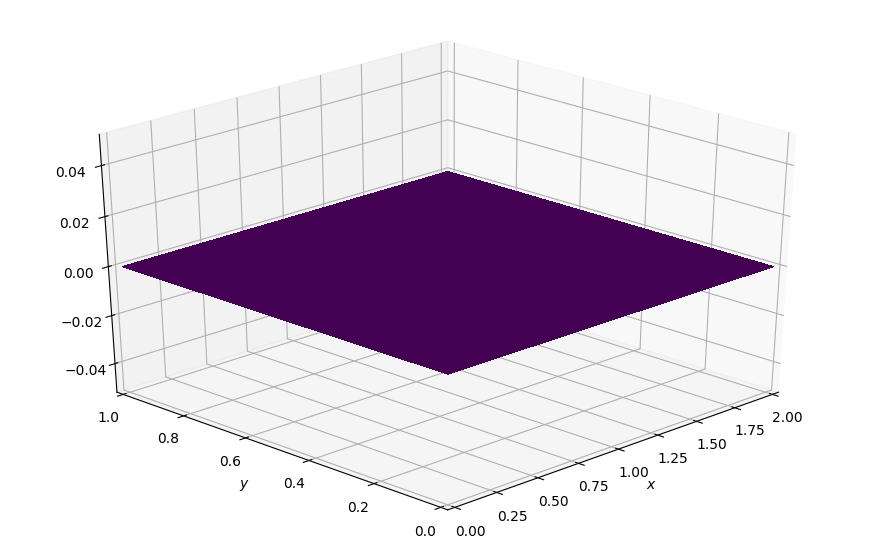

In [5]:
plot2D(x, y, p, xrange, yrange)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Number of iterations =  453


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars


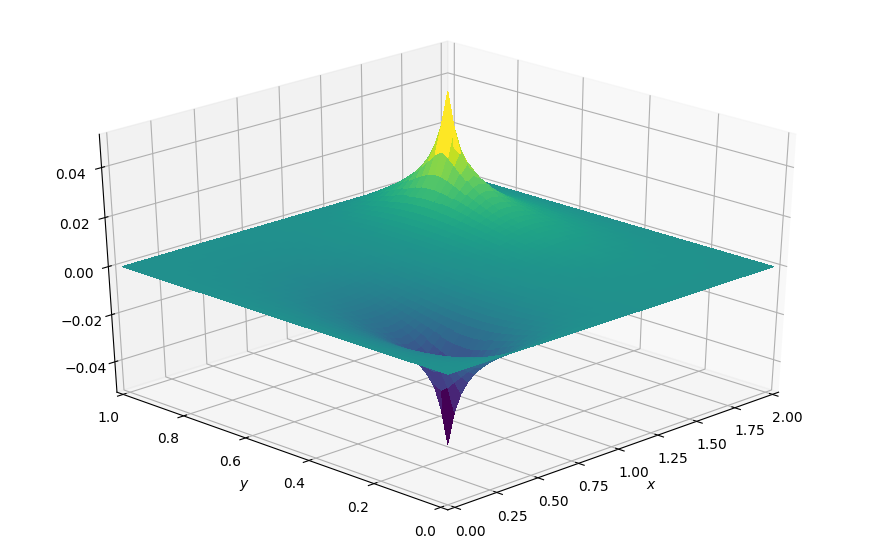

In [6]:
p, zarray, iterations = poisson2d(p, x, y, b, dx, dy, 1e-3)
plot2D(x, y, p, xrange, yrange)

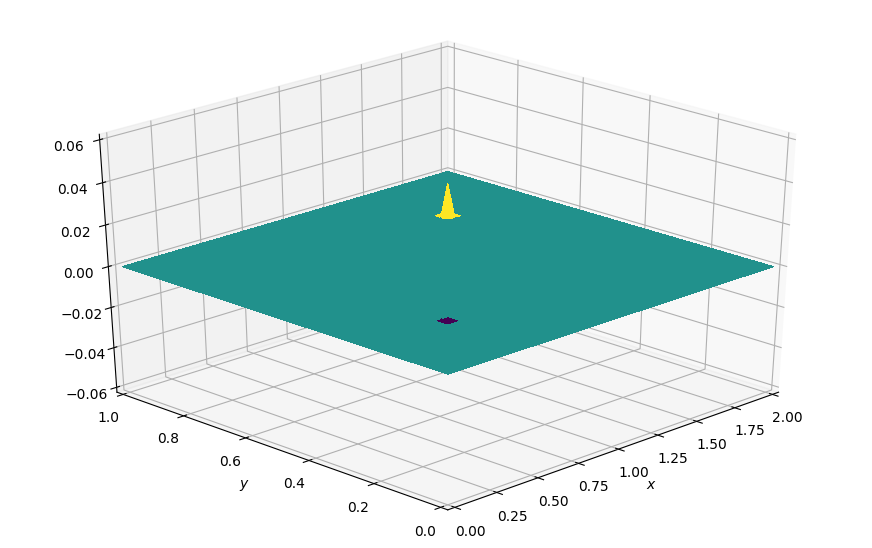

In [7]:
def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, zarray[:,:,frame_number], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')

fps = 60

plot = [ax.plot_surface(X, Y, zarray[:,:,0], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=1, antialiased=False)]
ax.set_zlim(-0.06,0.06)
ax.set_xlim(0, xrange)
ax.set_ylim(0, yrange)
ax.view_init(30, 225)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
    
ani = animation.FuncAnimation(fig, update_plot, iterations, fargs=(zarray, plot), interval=1000/fps, repeat=False)

#ani.save('Laplace_animation.mp4', fps=fps)

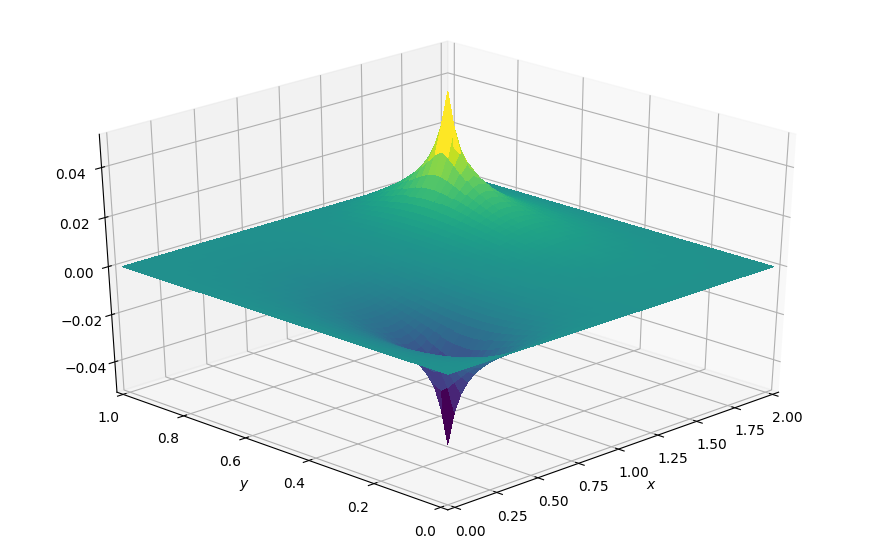

In [8]:
plot2D(x, y, p, xrange, yrange)

In [9]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [ ]:
ani